**DEVELOP NEURAL NETWORK THAT CAN READ HANDWRITING**



In [52]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

In [53]:
mnist=tf.keras.datasets.mnist

In [54]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [55]:
x_test.shape

(10000, 28, 28)

In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
x_train=x_train/255
x_test=x_test/255

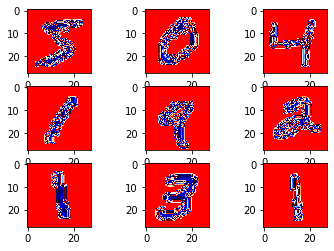

In [58]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i],cmap='flag')

In [59]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

In [60]:
x_train=x_train.reshape(60000,28,28,1)
#x_test=x_test.reshape(10000,28,28,1)

CNN MODEL

In [61]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [62]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.4488 - accuracy: 0.1239


[2.4487881660461426, 0.12389999628067017]

In [64]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2541 - accuracy: 0.9273
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1100 - accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0759 - accuracy: 0.9770
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0561 - accuracy: 0.9831
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0432 - accuracy: 0.9869


In [65]:
y_pred=[]
pred=model.predict(x_test)
for element in pred:
    y_pred.append(np.argmax(element))

313/313 [==============================] - 1s 2ms/step


In [66]:
y_pred=np.array(y_pred)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [67]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 966,    0,    1,    2,    2,    1,    3,    1,    1,    3],
       [   0, 1125,    3,    1,    0,    1,    2,    1,    2,    0],
       [   2,    2, 1011,    1,    3,    0,    2,    7,    3,    1],
       [   1,    0,    4,  991,    2,    0,    1,    5,    3,    3],
       [   1,    0,    4,    1,  964,    0,    1,    1,    0,   10],
       [   2,    0,    0,   11,    3,  866,    3,    2,    3,    2],
       [   4,    2,    0,    0,    3,    3,  942,    2,    2,    0],
       [   1,    2,    9,    1,    1,    0,    0, 1003,    2,    9],
       [   5,    0,    6,    7,    8,    5,    3,    4,  929,    7],
       [   1,    2,    0,    5,   12,    0,    0,    3,    0,  986]])

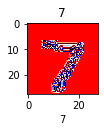

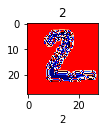

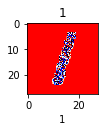

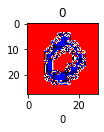

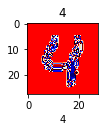

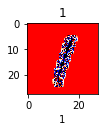

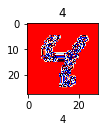

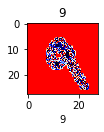

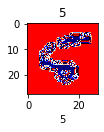

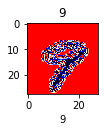

In [69]:
for i in range(0,10):
    plt.figure(figsize=(15,10))
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i],cmap='flag')
    plt.xlabel(y_pred[i])
    plt.title(y_test[i])

In [70]:
actual=y_test
predicted=y_pred
final=pd.DataFrame({'Actual':actual,'predicted':predicted})
final.head(20)

,Actual,predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


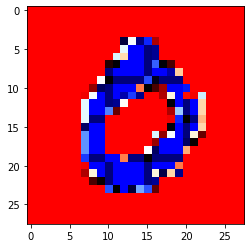

In [71]:
plt.imshow(x_test[3],cmap='flag')

In [72]:
prediction=model.predict(x_test)
print(np.argmax(prediction[3]))

313/313 [==============================] - 1s 2ms/step
0


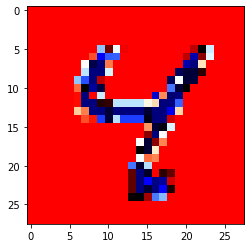

In [73]:
plt.imshow(x_test[6],cmap='flag')

In [74]:
prediction=model.predict(x_test)
print(np.argmax(prediction[6]))

313/313 [==============================] - 1s 2ms/step
4


**Thus,Accurately Predicted handwritten image as four,through our Neural Network that can read Handwriting** 